In [3]:
import matplotlib.pyplot as plt
from keras.datasets import mnist

## Load MNIST Dataset

In [2]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

### Show First Image

In [14]:
single_img = X_train[0,:,:,]

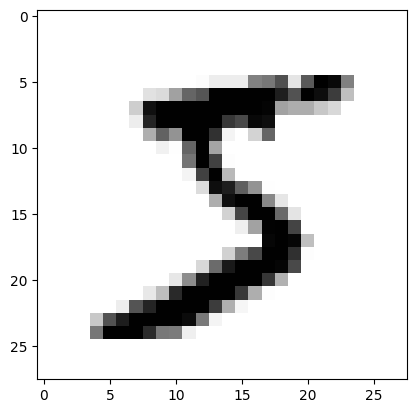

In [18]:
plt.imshow(single_img, cmap="gray_r")

In [21]:
y_train.shape

(60000,)

## One Hot Encoding

In [22]:
from keras.utils.np_utils import to_categorical

In [25]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test =  to_categorical(y_test, 10)

In [26]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [27]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Normalize X_train, X_test

In [28]:
X_train = X_train / X_train.max()

In [29]:
X_test = X_test / X_test.max()

In [30]:
X_train.max()

1.0

In [31]:
scaled_img = X_train[0]

In [33]:
scaled_img.max() # between 0-1

1.0

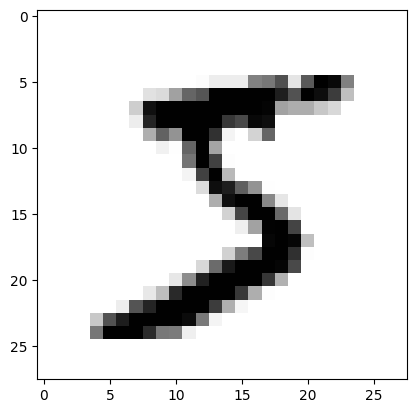

In [34]:
plt.imshow(scaled_img, "gray_r")

## Resahpe X_train, X_test

In [35]:
X_train.shape  # without color channel

(60000, 28, 28)

In [36]:
X_train = X_train.reshape(60000, 28, 28, 1)   # Adding color channel

In [37]:
X_train.shape

(60000, 28, 28, 1)

In [38]:
X_test.shape

(10000, 28, 28)

In [39]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [41]:
X_test.shape

(10000, 28, 28, 1)

## Define Model

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [44]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=(4,4), activation="relu"))

# Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten Layer  -- 2d ---> 1d
model.add(Flatten())

# Dense Layer
model.add(Dense(128, activation="relu"))

# Output Layer
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])


In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [46]:
model.fit(X_train, y_cat_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1417 - accuracy: 0.9567
Epoch 2/2
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0474 - accuracy: 0.9856


In [47]:
model.metrics_names

['loss', 'accuracy']

In [48]:
model.evaluate(X_test, y_cat_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0369 - accuracy: 0.9879


[0.03692212700843811, 0.9879000186920166]

In [52]:
import numpy as np
from sklearn.metrics import classification_report

In [56]:
y_pred = np.argmax(model.predict(X_test),axis=1)

313/313 [==============================] - 2s 5ms/step


In [57]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [58]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

